In [24]:
import torch

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

from dataset import HandGestureDataset
from model import HandGestureModel

In [12]:
model = HandGestureModel()
model.load_state_dict(torch.load('./models/2022-04-30-0/model.pt'))
model.eval()

val_dataset = HandGestureDataset(data_path='../data/dataset.json', dataset='test')

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       613
           1     1.0000    1.0000    1.0000       556
           2     1.0000    1.0000    1.0000       143
           3     1.0000    1.0000    1.0000       618
           4     1.0000    1.0000    1.0000       550
           5     1.0000    1.0000    1.0000       458

    accuracy                         1.0000      2938
   macro avg     1.0000    1.0000    1.0000      2938
weighted avg     1.0000    1.0000    1.0000      2938



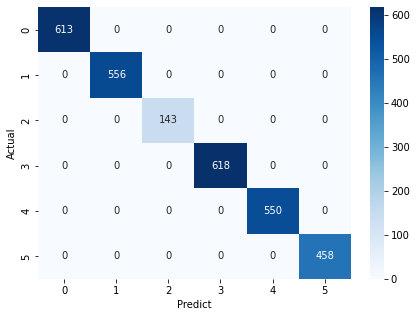

In [28]:
y_pred = []
y_true = []

for input, label in val_dataset:
    pred = model(torch.tensor([input]))
    y_pred.append(pred.argmax().item())
    y_true.append(label.argmax().item())

print(classification_report(y_true, y_pred, digits=4))
plt.figure(figsize=(7, 5))
ax = sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap='Blues', fmt='g')
ax.set(xlabel='Predict', ylabel='Actual')
plt.show()